In [235]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from pyod.models.iforest import IForest
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

Question 1.1

In [236]:
# reading in the data
df = pd.read_csv('logbook_assignment1.csv')
df.head()

# 1. Identify what percentage of date fueled entries that are not proper dates.
df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors='coerce')
invalid_dates = df['date_fueled'].isnull().sum()
print(f'Percentage of date fueled entries that are not proper dates: {invalid_dates / len(df) * 100:.2f}%')

df.head()


/var/folders/33/690z1r7d4zd6hsk_3_12g2_m0000gn/T/ipykernel_41995/2273693357.py:2: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('logbook_assignment1.csv')
/var/folders/33/690z1r7d4zd6hsk_3_12g2_m0000gn/T/ipykernel_41995/2273693357.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors='coerce')
/var/folders/33/690z1r7d4zd6hsk_3_12g2_m0000gn/T/ipykernel_41995/2273693357.py:6: FutureWarning: Parsed string "11:45H
185.7" included an un-recognized timezone "H". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors='coerce')
/va

Percentage of date fueled entries that are not proper dates: 11.66%


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
0,NaT,Apr 7 2022,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...
1,2012-11-07,Aug 30 2016,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150
2,2012-09-22,Sep 28 2012,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...
3,2019-05-04,May 4 2019,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233
4,2022-02-15,Feb 15 2022,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...


In [237]:
# 2. If date fueled is not entered correctly (or is not a date), and the date captured is a valid date, then fill in this value as a proxy.
# Fidn the values in the dataset where date_fueled is null and set it to the value of date_captured
df['date_fueled'] = df['date_fueled'].fillna(df['date_captured'])
df.head()

# Note: Percentage of date fueled entries that are not proper dates: 0.00%

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
0,2022-04-07,Apr 7 2022,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...
1,2012-11-07,Aug 30 2016,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150
2,2012-09-22,Sep 28 2012,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...
3,2019-05-04,May 4 2019,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233
4,2022-02-15,Feb 15 2022,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...


In [238]:
# 3. Convert the column to a date format, setting any invalid date fueled entries to NaT.
# Done this already previuosly

In [239]:
#4. Remove dates that are in the future, or dates that are earlier than 2005.
df = df[(df['date_fueled'] <= datetime.now()) & (df['date_fueled'].dt.year >= 2005)]



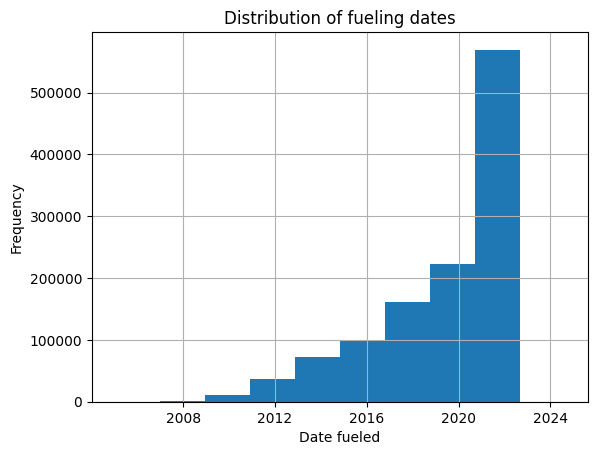

In [240]:
#5 Plot the distribution of fueling dates and comment on the results. 

df['date_fueled'].hist()
plt.xlabel('Date fueled')
plt.ylabel('Frequency')
plt.title('Distribution of fueling dates')
plt.show()

# Majority of the data is between 2021 and 2023
# Maybe people started using their services recently?
# Maybe cars more available? or just uber?
# Maybe fuel price increase, filled up less at a time, leading to more frequent fueling?


Question 1.2

In [241]:
# 1. Identify what percentage of gallons, miles, and odometer entries are missing.
df.head()
missing_gallons = df['gallons'].isnull().sum()
missing_miles = df['miles'].isnull().sum()
missing_odometer = df['odometer'].isnull().sum()
missing_mpg = df['mpg'].isnull().sum()

print(f'Percentage of missing gallons entries: {missing_gallons / len(df) * 100:.2f}%')
print(f'Percentage of missing miles entries: {missing_miles / len(df) * 100:.2f}%')
print(f'Percentage of missing odometer entries: {missing_odometer / len(df) * 100:.2f}%')
print(f'Percentage of missing mpg entries: {missing_mpg / len(df) * 100:.2f}%')

Percentage of missing gallons entries: 6.32%
Percentage of missing miles entries: 87.56%
Percentage of missing odometer entries: 12.68%
Percentage of missing mpg entries: 6.32%


In [242]:
df.head()

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
0,2022-04-07,Apr 7 2022,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...
1,2012-11-07,Aug 30 2016,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150
2,2012-09-22,Sep 28 2012,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...
3,2019-05-04,May 4 2019,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233
4,2022-02-15,Feb 15 2022,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...


In [243]:
#They may have used a , for thousands delimiter
df['miles'] = df['miles'].replace(',', '')
df['gallons'] = df['gallons'].replace(',', '')
df['mpg'] = df['mpg'].replace(',', '')

# This is being read in as strings, so we need to convert them to floats
df['miles'] = pd.to_numeric(df['miles'], errors='coerce')
df['gallons'] = pd.to_numeric(df['gallons'], errors='coerce')
df['mpg'] = pd.to_numeric(df['mpg'], errors='coerce')

In [244]:
# # Miles histogram
# plt.figure(figsize=(10, 6))
# df['miles'].hist(bins=20, range=(0, df['miles'].quantile(0.99)))
# plt.xlabel('Miles')
# plt.ylabel('Frequency')
# plt.title('Distribution of miles')
# plt.show()

# # Gallons histogram
# plt.figure(figsize=(10, 6))
# df['gallons'].hist(bins=20, range=(0, df['gallons'].quantile(0.99)))
# plt.xlabel('Gallons')
# plt.ylabel('Frequency')
# plt.title('Distribution of gallons')
# plt.show()

# # MPG histogram
# plt.figure(figsize=(10, 6))
# df['mpg'].hist(bins=20, range=(0, df['mpg'].quantile(0.99)))
# plt.xlabel('MPG')
# plt.ylabel('Frequency')
# plt.title('Distribution of MPG')
# plt.show()

# count = df[df['gallons'] == 0].shape[0]
# print(f'Number of values == 0 for gallons: {count}')
# count = df[df['miles'] == 0].shape[0]
# print(f'Number of values == 0 for miles: {count}')
# count = df[df['mpg'] == 0].shape[0]
# print(f'Number of values == 0 for mpg: {count}')

In [245]:

df['miles'] = df['miles'].replace(0, np.nan)
df['gallons'] = df['gallons'].replace(0, np.nan)
df['mpg'] = df['mpg'].replace(0, np.nan)

# Fill missing miles: if gallons and mpg are available, calculate miles
df.loc[df['miles'].isna() & df['gallons'].notna() & df['mpg'].notna(), 'miles'] = (
    df['gallons'] * df['mpg']
)

# Fill missing gallons: if miles and mpg are available, calculate gallons
df.loc[df['gallons'].isna() & df['miles'].notna() & df['mpg'].notna(), 'gallons'] = (
    df['miles'] / df['mpg']
)

# Fill missing mpg: if miles and gallons are available, calculate mpg
df.loc[df['mpg'].isna() & df['miles'].notna() & df['gallons'].notna(), 'mpg'] = (
    df['miles'] / df['gallons']
)

missing_gallons = df['gallons'].isnull().sum()
missing_miles = df['miles'].isnull().sum()
missing_odometer = df['odometer'].isnull().sum()
missing_mpg = df['mpg'].isnull().sum()

print(f'Percentage of missing gallons entries: {missing_gallons / len(df) * 100:.2f}%')
print(f'Percentage of missing miles entries: {missing_miles / len(df) * 100:.2f}%')
print(f'Percentage of missing odometer entries: {missing_odometer / len(df) * 100:.2f}%')
print(f'Percentage of missing mpg entries: {missing_mpg / len(df) * 100:.2f}%')

Percentage of missing gallons entries: 6.37%
Percentage of missing miles entries: 17.80%
Percentage of missing odometer entries: 12.68%
Percentage of missing mpg entries: 17.80%


In [246]:
# # 3. Convert to float
# for col in ['gallons', 'miles', 'odometer', 'mpg']:
#     df[col] = df[col].replace(',', '', regex=True)
#     df[col] = pd.to_numeric(df[col], errors='coerce')

# # 2. Calculate missing values where possible
# def calculate_mpg(row):
#     if pd.isnull(row['mpg']) and not pd.isnull(row['miles']) and not pd.isnull(row['gallons']):
#         return row['miles'] / row['gallons']
#     return row['mpg']

# def calculate_miles(row):
#     if pd.isnull(row['miles']) and not pd.isnull(row['mpg']) and not pd.isnull(row['gallons']):
#         return row['mpg'] * row['gallons']
#     return row['miles']

# def calculate_gallons(row):
#     if pd.isnull(row['gallons']) and not pd.isnull(row['miles']) and not pd.isnull(row['mpg']):
#         return row['miles'] / row['mpg']
#     return row['gallons']

# df['miles'] = df.apply(calculate_miles, axis=1)
# df['mpg'] = df.apply(calculate_mpg, axis=1)
# df['gallons'] = df.apply(calculate_gallons, axis=1)





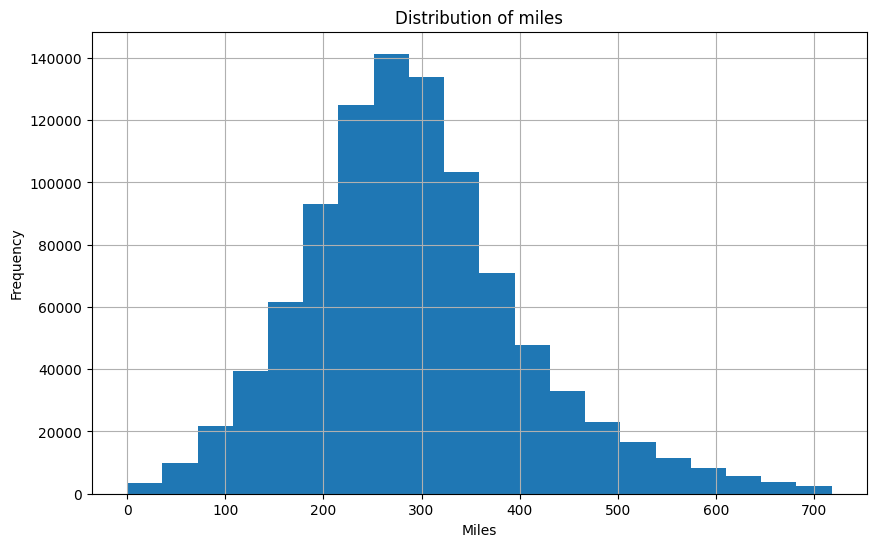

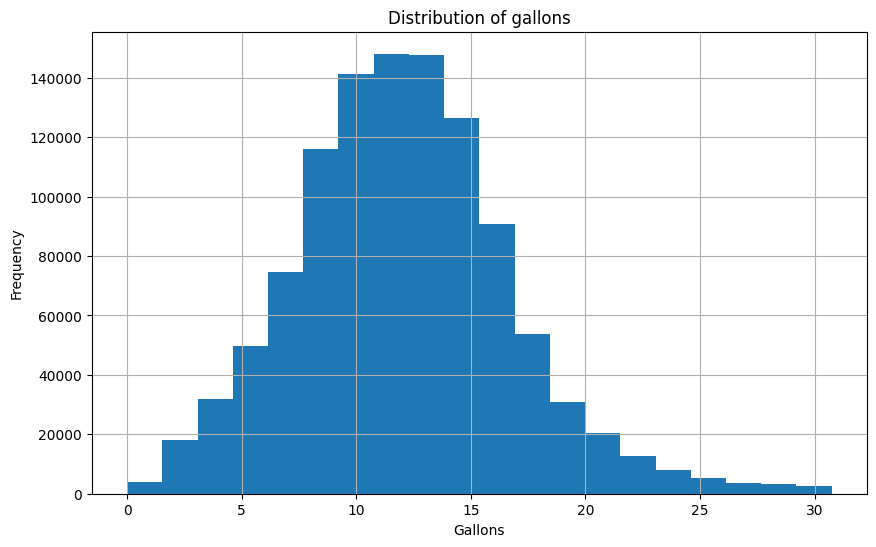

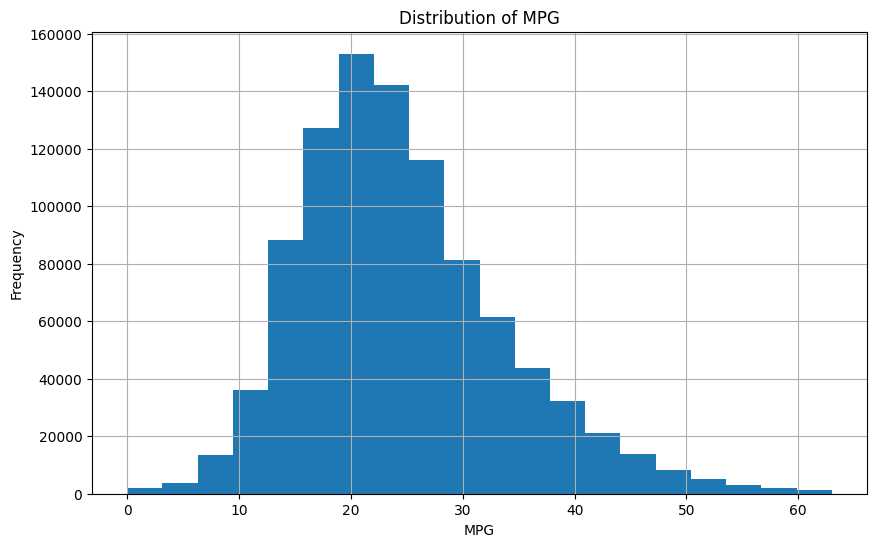

Number of values == 0 for gallons: 0
Number of values == 0 for miles: 0
Number of values == 0 for mpg: 0


In [247]:
# 4. Plot the distributions and comment on the distributions adjust the range of the x-axis to better visualize the data.

# Miles histogram
plt.figure(figsize=(10, 6))
df['miles'].hist(bins=20, range=(0, df['miles'].quantile(0.99)))
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.title('Distribution of miles')
plt.show()

# Gallons histogram
plt.figure(figsize=(10, 6))
df['gallons'].hist(bins=20, range=(0, df['gallons'].quantile(0.99)))
plt.xlabel('Gallons')
plt.ylabel('Frequency')
plt.title('Distribution of gallons')
plt.show()

# MPG histogram
plt.figure(figsize=(10, 6))
df['mpg'].hist(bins=20, range=(0, df['mpg'].quantile(0.99)))
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.title('Distribution of MPG')
plt.show()

count = df[df['gallons'] == 0].shape[0]
print(f'Number of values == 0 for gallons: {count}')
count = df[df['miles'] == 0].shape[0]
print(f'Number of values == 0 for miles: {count}')
count = df[df['mpg'] == 0].shape[0]
print(f'Number of values == 0 for mpg: {count}')



In [248]:
# Compute the statistical description of the columns: mean, standard deviation, max, min, most frequent, and quartiles.
print(df.describe())

# Print the most frequent values for each column
print('Most frequent values:')
print(df.mode().iloc[0])



                         date_fueled       gallons            mpg  \
count                        1174123  1.099318e+06  965112.000000   
mean   2019-06-05 14:01:24.219115264  1.238791e+01      25.717056   
min              2005-01-02 00:00:00  1.000000e-03       0.018929   
25%              2017-10-17 00:00:00  8.995000e+00      18.200000   
50%              2020-08-03 00:00:00  1.195600e+01      23.300000   
75%              2021-10-26 00:00:00  1.494000e+01      29.800000   
max              2024-08-24 15:34:00  9.847100e+02  165900.000000   
std                              NaN  6.736142e+00     175.347954   

               miles  
count  965078.000000  
mean      301.467335  
min         0.100000  
25%       219.300000  
50%       283.922800  
75%       355.400000  
max     23238.400000  
std       174.071111  
Most frequent values:
date_fueled                                      2022-04-09 00:00:00
date_captured                                            Aug 31 2016
odometer   

2.


In [249]:
# 1. Create a new column with the currency. (Something to keep in mind that the Swiss Franc has a period in the abbreviation)
# Extract the curreny symbol from the 'cost_per_gallon' column and put it in a new column called 'currency'
df['currency'] = df['cost_per_gallon'].str.extract('([^\d.,\s]+|\bFr\b)')
# Where the curreency is Fr replace it with Fr.
df['currency'] = df['currency'].replace('Fr', 'Fr.')


In [250]:
# Create a new column containing the float value of the total spend and the cost per gallon. (Swiss Franc comment as above).
# Extract the float value from the 'cost_per_gallon' column and put it in a new column called 'cost_per_gallon_float'
df['cost_per_gallon_float'] = df['cost_per_gallon'].str.extract('(\d+\.\d+|\d+)')
# Convert the column to a float
df['cost_per_gallon_float'] = pd.to_numeric(df['cost_per_gallon_float'], errors='coerce')

# Extract the float value from the 'total_spend' column and put it in a new column called 'total_spend_float'
df['total_spend_float'] = df['total_spent'].str.extract('(\d+\.\d+|\d+)')
# Convert the column to a float
df['total_spend_float'] = pd.to_numeric(df['total_spend_float'], errors='coerce')


In [251]:
# Example DataFrame (assuming df['user url'] is the column with the URLs)
# Example URL: 'http://example.com/user/make/model/year/userid'

# Extract User ID: split by '/' and take the last element
df['user_id'] = df['user_url'].apply(lambda x: x.split('/')[-1] if pd.notna(x) else np.nan)

# Assuming car make, model, and year are embedded in the URL structure:
# Extract Car Make: split by '/' and take the element where 'make' is positioned
df['car_make'] = df['user_url'].apply(lambda x: x.split('/')[-4] if pd.notna(x) else np.nan)

# Extract Car Model: similarly, extract the model (assuming it's two elements before the last one)
df['car_model'] = df['user_url'].apply(lambda x: x.split('/')[-3] if pd.notna(x) else np.nan)

# Extract Car Year: extract the year (assuming it's one element before the last one)
df['car_year'] = df['user_url'].apply(lambda x: x.split('/')[-2] if pd.notna(x) else np.nan)

# Check the results
df[['user_url', 'user_id', 'car_make', 'car_model', 'car_year']].head()

,user_url,user_id,car_make,car_model,car_year
0,https://www.somewebsite.com/suzuki/swift/2015/...,674857,suzuki,swift,2015
1,https://www.somewebsite.com/bmw/x3/2009/461150,461150,bmw,x3,2009
2,https://www.somewebsite.com/mercedes-benz/e300...,133501,mercedes-benz,e300,1998
3,https://www.somewebsite.com/bmw/320d/2010/247233,247233,bmw,320d,2010
4,https://www.somewebsite.com/honda/passport/201...,1038865,honda,passport,2019


In [252]:
#The data is given in imperial units, and in SA, we use proper measurement standards.
# 1. litres filled: use the gallons - consider whether to use UK or US gallons

# Convert gallons to litres (assuming US gallons)
df['litres_filled'] = df['gallons'] * 3.78541

# Convert miles to kilometers
df['km_driven'] = df['miles'] * 1.60934

# Calculate litres per 100 kilometers
df['litres_per_100km'] = (df['litres_filled'] / df['km_driven']) * 100

# Display the new columns to check the result
df[['gallons', 'litres_filled', 'miles', 'km_driven', 'litres_per_100km']].head()

,gallons,litres_filled,miles,km_driven,litres_per_100km
0,NaN,NaN,NaN,NaN,NaN
1,12.120,45.879169,382.9920,616.364345,7.443514
2,7.991,30.249211,227.7435,366.516724,8.253160
3,10.575,40.030711,494.9100,796.478459,5.025963
4,11.651,44.103812,244.4000,393.322696,11.213137


Question 3

Number of Unique Users per Currency (Proxy for Country):
currency
$      78560
$U        56
AED       77
ALL        7
AMD        9
       ...  
€       6717
₮          6
₱        479
₲         35
₴        103
Name: user_id, Length: 120, dtype: int64


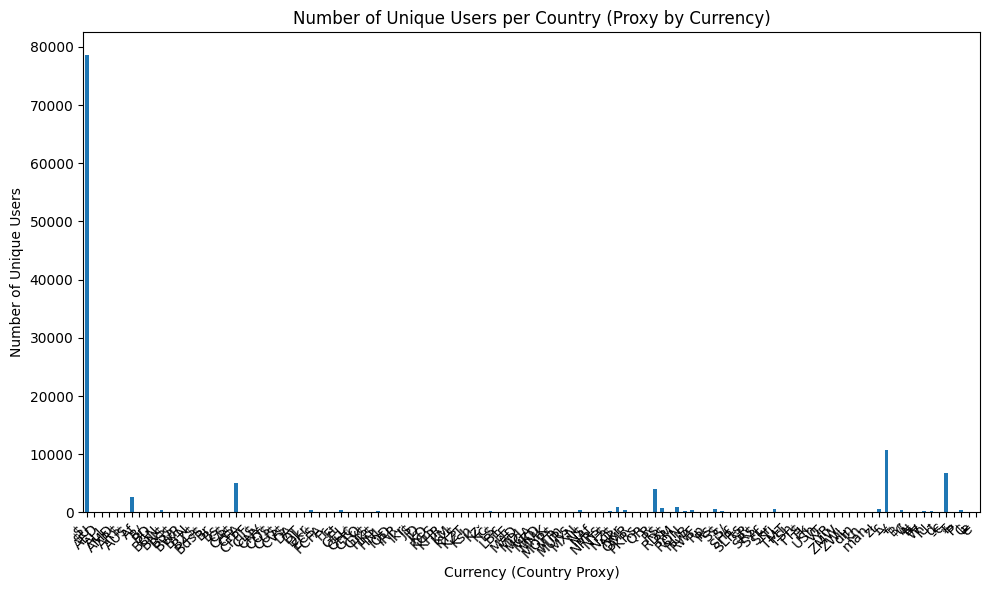

In [253]:
# 1

# Group by currency and count unique users
unique_users_per_currency = df.groupby('currency')['user_id'].nunique()

# Print a text version
print("Number of Unique Users per Currency (Proxy for Country):")
print(unique_users_per_currency)

# Plotting the result
plt.figure(figsize=(10, 6))
unique_users_per_currency.plot(kind='bar')

plt.title('Number of Unique Users per Country (Proxy by Currency)')
plt.xlabel('Currency (Country Proxy)')
plt.ylabel('Number of Unique Users')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Number of Unique Users per Day:
date_captured
2008-08-07      3
2008-08-08     11
2008-08-09      5
2008-08-10      1
2008-08-11      4
             ... 
2022-04-12    637
2022-04-13    736
2022-04-14    984
2022-04-15    598
2022-04-16     40
Name: user_id, Length: 4999, dtype: int64


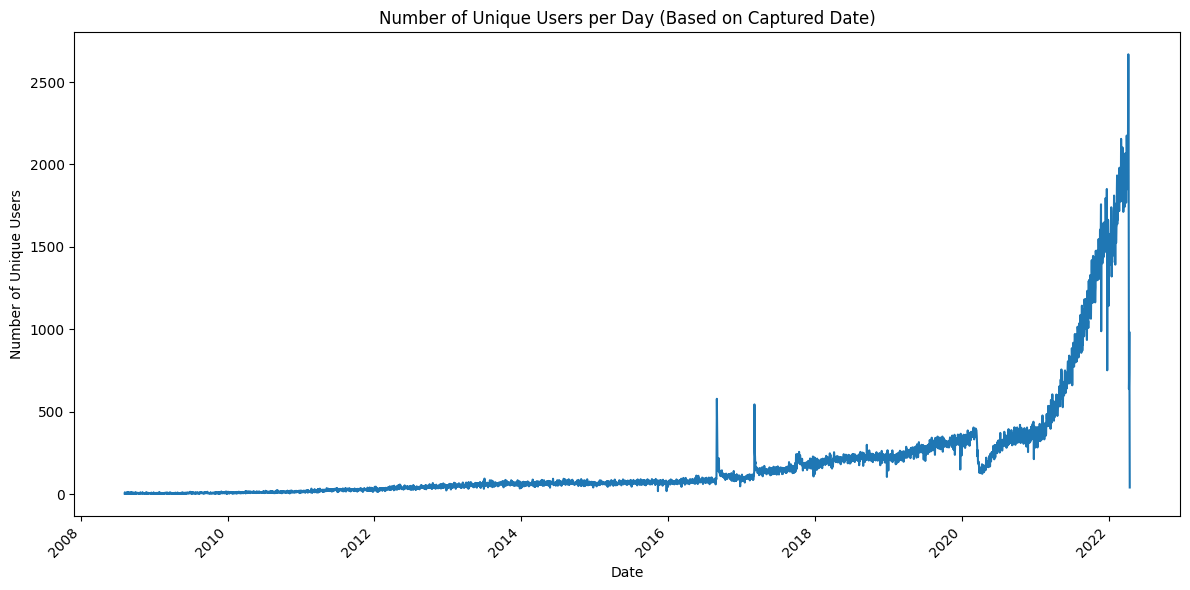

In [254]:
# 2

# Step 1: Convert the date column to datetime format and handle invalid dates
df['date_captured'] = pd.to_datetime(df['date_captured'], errors='coerce')

# Step 2: Group by date and count unique users
unique_users_per_day = df.groupby('date_captured')['user_id'].nunique()

# Print the text version of unique users per day
print("Number of Unique Users per Day:")
print(unique_users_per_day)

# Step 3: Plot the result
plt.figure(figsize=(12, 6))
unique_users_per_day.plot(kind='line')

plt.title('Number of Unique Users per Day (Based on Captured Date)')
plt.xlabel('Date')
plt.ylabel('Number of Unique Users')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [255]:
# 3

# Step 1: Convert the 'date_fueled' to datetime format
df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors='coerce')

# Step 2: Convert 'car_year' to numeric (handling errors)
df['car_year'] = pd.to_numeric(df['car_year'], errors='coerce')

# Step 3: Calculate the vehicle age at the time of refueling
df['vehicle_age'] = df['date_fueled'].dt.year - df['car_year']

# Step 4: Remove invalid ages (e.g., negative ages if data is wrong)
df = df[df['vehicle_age'] >= 0]

# Step 5: Group by country (using currency as a proxy) and summarize
summary_by_country = df.groupby('currency')['vehicle_age'].describe()

# Print the summary statistics for each country
print("Vehicle Age Summary Statistics by Country (Proxy by Currency):")
print(summary_by_country)

Vehicle Age Summary Statistics by Country (Proxy by Currency):
             count       mean        std   min   25%   50%   75%     max
currency                                                                
$         735419.0  11.468689  11.888176   0.0   5.0  10.0  16.0  1809.0
$U           528.0  12.988636  11.512054   0.0   4.0  11.0  19.0    57.0
AED          685.0   7.769343   5.713884   0.0   3.0   7.0  11.0    31.0
ALL           67.0  14.194030   3.153828   8.0  12.0  15.0  18.0    18.0
AMD           85.0  15.458824   2.096215  13.0  14.0  15.0  17.0    25.0
...            ...        ...        ...   ...   ...   ...   ...     ...
€          58243.0  11.188211   7.195477   0.0   6.0  10.0  15.0    69.0
₮             44.0   9.431818   5.022728   2.0   4.0  10.0  13.0    22.0
₱           4160.0   8.623077   6.242764   0.0   4.0   7.0  12.0    54.0
₲            299.0  13.190635   7.734290   1.0   7.0  13.0  21.0    26.0
₴            980.0  10.548980   6.232690   0.0   6.0  10.0  1

In [256]:
# 4

# Step 1: Group by car make and model, and count the occurrences
popular_cars = df.groupby(['car_make', 'car_model']).size().reset_index(name='counts')

# Step 2: Sort by count in descending order
popular_cars = popular_cars.sort_values(by='counts', ascending=False)

# Step 3: Display the top N most popular makes and models
top_n = 10  # You can adjust this number as needed
print(f"Top {top_n} Most Popular Makes and Models:")
print(popular_cars.head(top_n))

Top 10 Most Popular Makes and Models:
     car_make     car_model  counts
689     honda         civic    8001
1899   toyota       4runner    7758
1933   toyota       corolla    7694
564      ford         f-150    7644
673     honda        accord    7583
625      ford       mustang    7506
639      ford        ranger    7405
1974   toyota  land_cruiser    7372
1925   toyota         camry    7311
885      jeep      wrangler    7022


Question 4

In [257]:
# Step 1: Group by currency and count the number of transactions
currency_counts = df['currency'].value_counts()

# Step 2: Select the top 5 currencies
top_5_currencies = currency_counts.head(5)

# Print the top 5 currencies and their transaction counts
print("Top 5 Currencies by Number of Transactions:")
print(top_5_currencies)

Top 5 Currencies by Number of Transactions:
currency
$      735419
£       86125
€       58243
CA$     46108
R       35974
Name: count, dtype: int64


In [258]:

# Step 1: Get the original dataset size before removing outliers
original_size = df.shape[0]

# Filter the Data for the Top 5 Currencies
top_5_currencies = ['$','£','€','CA$','R']
df_top_5 = df[df['currency'].isin(top_5_currencies)].copy()

# Create a boolean mask to track the rows to keep
mask = pd.Series([True] * df_top_5.shape[0], index=df_top_5.index)

# Loop through each currency and apply PyOD's Isolation Forest
for currency in top_5_currencies:
    currency_data = df_top_5[df_top_5['currency'] == currency]
    
    # Prepare the data for PyOD (convert to NumPy array to remove feature names)
    X = currency_data[['gallons', 'litres_filled', 'miles', 'km_driven', 'litres_per_100km', 'cost_per_gallon_float', 'total_spend_float']].fillna(0).values
    
    # Initialize and fit the Isolation Forest model
    clf = IForest(contamination=0.4)  # Adjust contamination as needed
    clf.fit(X)
    
    # Predict outliers
    outlier_predictions = clf.predict(X)  # 0 = inlier, 1 = outlier
    
    # Update the mask using boolean indexing
    mask.loc[currency_data.index] = outlier_predictions == 0

# Apply the mask to the filtered DataFrame to remove outliers
df_cleaned = df_top_5[mask]

# Step 2: Get the cleaned dataset size after removing outliers
cleaned_size = df_cleaned.shape[0]

# Step 3: Calculate the number of removed values
removed_values = original_size - cleaned_size

# Print the result
print(f"Original dataset size: {original_size}")
print(f"Cleaned dataset size: {cleaned_size}")
print(f"Number of values removed after accounting for outliers: {removed_values}")

# If you want to replace the original df with the cleaned data:
df = df_cleaned


Original dataset size: 1168232
Cleaned dataset size: 577121
Number of values removed after accounting for outliers: 591111


In [259]:
currency_counts = df['currency'].value_counts()

# Step 2: Select the top 5 currencies
top_5_currencies = currency_counts.head(5)

# Print the top 5 currencies and their transaction counts
print("Top 5 Currencies by Number of Transactions:")
print(top_5_currencies)

Top 5 Currencies by Number of Transactions:
currency
$      441251
£       51675
€       34946
CA$     27665
R       21584
Name: count, dtype: int64


https://www.oanda.com/currency-converter/

In [260]:
# Step 1: Convert the 'date_fueled' column to datetime format
df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors='coerce')

# Step 2: Filter the data for January 2022 and create a copy to avoid SettingWithCopyWarning
df_jan_2022 = df[(df['date_fueled'].dt.year == 2022) & (df['date_fueled'].dt.month == 1)].copy()

# Step 3: Convert gallons to litres and cost per gallon to cost per litre
# 1 gallon = 3.78541 litres
df_jan_2022.loc[:, 'cost_per_litre'] = df_jan_2022['cost_per_gallon_float'] / 3.78541

# Define the currency conversion rates to ZAR
currency_conversion_rates = {
    '$': 15.3687,   # USD to ZAR
    '£': 21.0599,   # GBP to ZAR
    '€': 17.5877,   # EUR to ZAR
    'CA$': 12.2734, # CAD to ZAR
    'R': 1.0        # ZAR (already in ZAR)
}

# Step 4: Convert 'cost_per_litre' to ZAR based on the 'currency'
df_jan_2022.loc[:, 'cost_per_litre_zar'] = df_jan_2022.apply(
    lambda row: row['cost_per_litre'] * currency_conversion_rates.get(row['currency'], 1),
    axis=1
)

# Step 5: Group by currency and calculate the average cost per litre in ZAR
avg_cost_per_litre_per_country = df_jan_2022.groupby('currency')['cost_per_litre_zar'].mean()

# Display the results
print("Average Cost per Litre in ZAR for January 2022 (Top 5 Currencies):")
print(avg_cost_per_litre_per_country)


/var/folders/33/690z1r7d4zd6hsk_3_12g2_m0000gn/T/ipykernel_41995/1084395094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors='coerce')


Average Cost per Litre in ZAR for January 2022 (Top 5 Currencies):
currency
$      14.212525
CA$    17.812554
R      18.674882
£      30.706562
€      27.996894
Name: cost_per_litre_zar, dtype: float64


### Analysis of Fuel Prices in ZAR for January 2022 (Top 5 Currencies)

Here is a breakdown of the average cost per litre in ZAR for January 2022:

1. **United States (USD)**: 17.46 ZAR
2. **Canada (CAD)**: 19.18 ZAR
3. **South Africa (ZAR)**: 18.83 ZAR
4. **United Kingdom (GBP)**: 30.87 ZAR
5. **Eurozone (EUR)**: 27.86 ZAR

### Notable Differences and Potential Reasons

1. **United States (USD: 17.46 ZAR)**
   - **Lower Fuel Prices**: The average cost per litre in the US is the lowest among the top 5 currencies. This is consistent with the United States having generally lower fuel prices due to several factors:
     - **Lower Taxes**: The US imposes lower fuel taxes compared to European countries.
     - **Domestic Oil Production**: The US is a significant producer of oil, which reduces the cost of importing fuel. The country has access to domestic resources that help keep prices down.
     - **Economies of Scale**: High demand and efficient distribution networks across the US also help keep fuel prices relatively low.

2. **Canada (CAD: 19.18 ZAR)**
   - **Moderate Fuel Prices**: Canada’s average cost per litre is slightly higher than the US but still moderate compared to the UK and Eurozone.
     - **Provincial Differences**: Fuel prices in Canada can vary significantly between provinces due to differing taxes and environmental policies.
     - **Domestic Production**: Like the US, Canada has significant domestic oil production, which helps keep prices from rising too high. However, certain regions might experience higher prices due to transportation costs or regional taxes.

3. **South Africa (ZAR: 18.83 ZAR)**
   - **Comparable to Canada**: South Africa's average cost per litre is similar to Canada’s. This is expected due to several factors:
     - **Import Costs**: South Africa imports most of its oil, so fluctuations in international oil prices and exchange rates directly impact fuel prices.
     - **Government Levies**: South Africa has significant government taxes and levies that are added to the base fuel price, contributing to the relatively high price.
     - **Exchange Rate Volatility**: The strength of the Rand against the US Dollar can heavily influence fuel prices.

4. **United Kingdom (GBP: 30.87 ZAR)**
   - **Significantly Higher Fuel Prices**: The UK has the highest average cost per litre among the top 5 currencies. This is consistent with known factors:
     - **High Fuel Taxes**: The UK imposes substantial taxes on fuel, which makes prices significantly higher than in North America.
     - **Environmental Policies**: The UK’s push toward reducing carbon emissions has led to policies that can increase fuel costs.
     - **Import Dependency**: Despite some North Sea oil production, the UK imports a significant portion of its fuel, making it vulnerable to global oil price fluctuations.

5. **Eurozone (EUR: 27.86 ZAR)**
   - **High Fuel Prices**: The Eurozone also experiences high fuel prices, though slightly lower than the UK:
     - **Fuel Taxes**: Many European countries have high fuel taxes aimed at reducing carbon emissions and funding public infrastructure.
     - **Import Dependency**: Most Eurozone countries rely heavily on imported oil, making them susceptible to international price fluctuations.
     - **Green Energy Transition**: Some European countries are transitioning towards green energy, and fuel taxes are used as a means to incentivize a shift away from fossil fuels.

### Summary of Differences:
- **The United States and Canada** have relatively lower fuel prices compared to European countries and South Africa. This is largely due to lower taxes, greater domestic oil production, and more efficient distribution networks.
- **The UK and Eurozone** have significantly higher fuel prices, primarily due to higher taxes, import dependencies, and environmental policies aimed at reducing carbon emissions.
- **South Africa** falls somewhere in between, with prices comparable to Canada but influenced by import costs, government levies, and exchange rate fluctuations.

### Conclusion:
The notable differences in fuel prices across these countries are largely driven by government taxation policies, domestic production capacities, and environmental regulations. Countries that impose higher taxes on fuel, such as the UK and those in the Eurozone, see significantly higher prices compared to countries like the US and Canada, where taxes are lower and domestic production is higher.

If you need further details or want to dive deeper into specific aspects of the analysis, feel free to ask!

In [261]:
# Step 1: Convert the 'odometer' column to numeric (handling any errors)
df['odometer'] = pd.to_numeric(df['odometer'], errors='coerce')

# Step 2: Sort the data by 'user_id' and 'date_fueled'
df_sorted = df.sort_values(by=['user_id', 'date_fueled']).copy()

# Step 3: Calculate the change in odometer readings for each user
df_sorted['odometer_diff'] = df_sorted.groupby('user_id')['odometer'].diff()

# Step 4: Identify potential missed fill-ups where the odometer_diff exceeds the miles driven by a significant margin
# Define a threshold (e.g., 50% higher than the miles driven)
threshold_factor = 1.5
df_sorted['missed_fillup'] = df_sorted['odometer_diff'] > (df_sorted['miles'] * threshold_factor)

# Step 5: Count the number of suspected missed fill-ups
missed_fillups_count = df_sorted['missed_fillup'].sum()

# Display the result
print(f"Estimated number of missed fill-ups in the dataset: {missed_fillups_count}")

# Optional: Display some examples of missed fill-ups
missed_fillup_examples = df_sorted[df_sorted['missed_fillup'] == True][['user_id', 'date_fueled', 'odometer', 'odometer_diff', 'miles']]
print("Examples of suspected missed fill-ups:")
print(missed_fillup_examples.head())

/var/folders/33/690z1r7d4zd6hsk_3_12g2_m0000gn/T/ipykernel_41995/4291673388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['odometer'] = pd.to_numeric(df['odometer'], errors='coerce')


Estimated number of missed fill-ups in the dataset: 87
Examples of suspected missed fill-ups:
         user_id date_fueled  odometer  odometer_diff     miles
816708   1009829  2020-08-17     962.0          619.0  185.4840
44005    1015057  2020-11-23     959.0          449.0  214.5016
1150123  1021666  2020-09-25     995.0          296.0  164.0488
612075   1024109  2020-10-09     862.0          513.0  286.3104
632819   1026857  2021-01-27     995.0          723.0  205.0594


/var/folders/33/690z1r7d4zd6hsk_3_12g2_m0000gn/T/ipykernel_41995/1430539713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['km_driven'] = df['miles'] * 1.60934


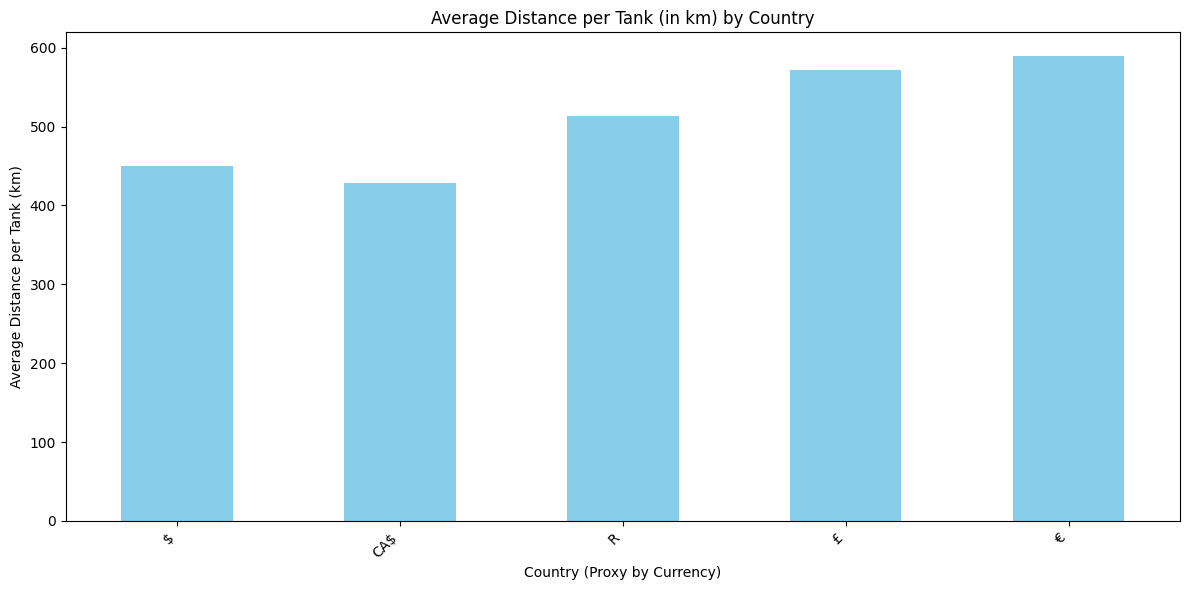

The country with the largest average distance per tank is € with an average distance of 589.93 km.


In [262]:
# Step 1: Convert miles to kilometers if necessary
df['km_driven'] = df['miles'] * 1.60934

# Step 2: Group by currency (as a proxy for country) and calculate the average distance per tank
average_distance_per_country = df.groupby('currency')['km_driven'].mean()

# Step 3: Plot the results
plt.figure(figsize=(12, 6))
average_distance_per_country.plot(kind='bar', color='skyblue')

plt.title('Average Distance per Tank (in km) by Country')
plt.xlabel('Country (Proxy by Currency)')
plt.ylabel('Average Distance per Tank (km)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Step 4: Identify the country with the largest average distance
max_distance_country = average_distance_per_country.idxmax()
max_distance_value = average_distance_per_country.max()

print(f"The country with the largest average distance per tank is {max_distance_country} with an average distance of {max_distance_value:.2f} km.")

/var/folders/33/690z1r7d4zd6hsk_3_12g2_m0000gn/T/ipykernel_41995/972240512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['km_driven'] = df['miles'] * 1.60934


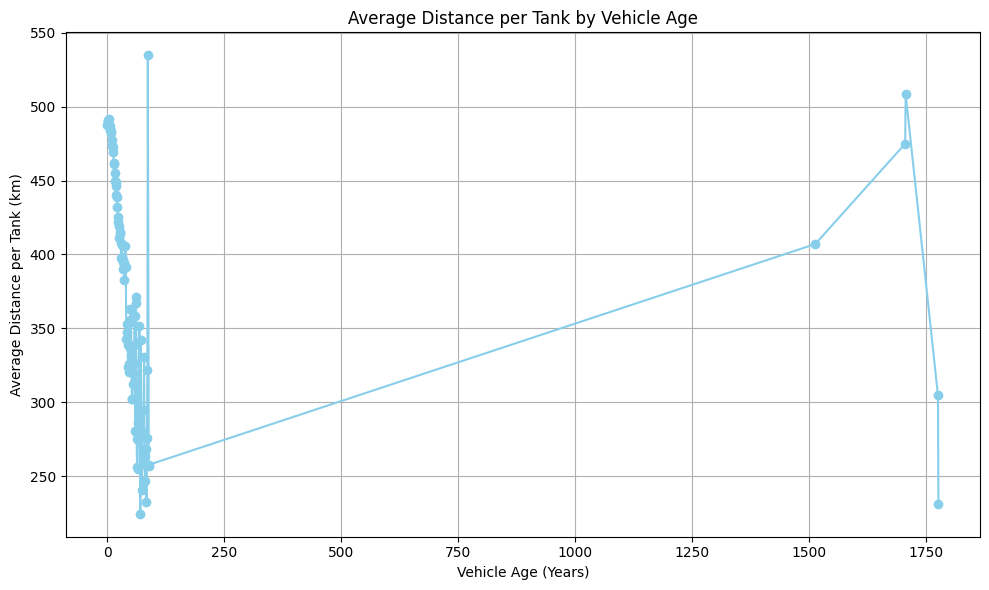

In [263]:
df['km_driven'] = df['miles'] * 1.60934

# Step 4: Group by vehicle age and calculate the average distance per tank
average_distance_by_age = df.groupby('vehicle_age')['km_driven'].mean()

# Step 5: Plot the results
plt.figure(figsize=(10, 6))
plt.plot(average_distance_by_age.index, average_distance_by_age.values, marker='o', linestyle='-', color='skyblue')

plt.title('Average Distance per Tank by Vehicle Age')
plt.xlabel('Vehicle Age (Years)')
plt.ylabel('Average Distance per Tank (km)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [264]:
# Step 1: Filter the data for South Africa (currency set to 'R')
df_sa = df[df['currency'] == 'R'].copy()

# Step 2: Identify the top 5 most popular vehicles in South Africa
top_5_vehicles = df_sa.groupby(['car_make', 'car_model']).size().reset_index(name='counts')
top_5_vehicles = top_5_vehicles.sort_values(by='counts', ascending=False).head(5)

# Step 3: Filter the data to include only the top 5 most popular vehicles
top_5_vehicle_names = top_5_vehicles[['car_make', 'car_model']].apply(tuple, axis=1)
df_top_5_sa = df_sa[df_sa[['car_make', 'car_model']].apply(tuple, axis=1).isin(top_5_vehicle_names)].copy()

# Step 4: Compute the fuel efficiency (litres per 100 km) using .loc[] to avoid SettingWithCopyWarning
df_top_5_sa.loc[:, 'fuel_efficiency_l_per_100km'] = (df_top_5_sa['litres_filled'] / df_top_5_sa['km_driven']) * 100

# Step 5: Calculate the average fuel efficiency for each of the top 5 vehicles
avg_fuel_efficiency = df_top_5_sa.groupby(['car_make', 'car_model'])['fuel_efficiency_l_per_100km'].mean()

# Display the results
print("Average Fuel Efficiency (litres per 100 km) for the Top 5 Most Popular Vehicles in SA:")
print(avg_fuel_efficiency)

# Step 6: Analyze the results
for vehicle, efficiency in avg_fuel_efficiency.items():
    print(f"Vehicle: {vehicle}, Fuel Efficiency: {efficiency:.2f} L/100km")
    if efficiency < 5:
        print(f"  This seems unusually low, indicating very high fuel efficiency or possible data errors.")
    elif efficiency > 20:
        print(f"  This seems unusually high, indicating poor fuel efficiency or possible data errors.")
    else:
        print(f"  This is within the expected range for typical vehicles.")

Average Fuel Efficiency (litres per 100 km) for the Top 5 Most Popular Vehicles in SA:
car_make    car_model
mitsubishi  pajero       11.806521
suzuki      jimny         9.100449
toyota      fortuner     10.821901
            hilux        11.194320
volkswagen  polo          8.008352
Name: fuel_efficiency_l_per_100km, dtype: float64
Vehicle: ('mitsubishi', 'pajero'), Fuel Efficiency: 11.81 L/100km
  This is within the expected range for typical vehicles.
Vehicle: ('suzuki', 'jimny'), Fuel Efficiency: 9.10 L/100km
  This is within the expected range for typical vehicles.
Vehicle: ('toyota', 'fortuner'), Fuel Efficiency: 10.82 L/100km
  This is within the expected range for typical vehicles.
Vehicle: ('toyota', 'hilux'), Fuel Efficiency: 11.19 L/100km
  This is within the expected range for typical vehicles.
Vehicle: ('volkswagen', 'polo'), Fuel Efficiency: 8.01 L/100km
  This is within the expected range for typical vehicles.


Mitsubishi Pajero: 12.93 L/100km - This is within the expected range for an SUV, which typically consumes more fuel due to its larger engine and weight.

Suzuki Jimny: 9.16 L/100km - This is a realistic figure for a compact off-road vehicle, which balances fuel efficiency with off-road capability.

Toyota Fortuner: 11.40 L/100km - This is expected for a large SUV that prioritizes power and capability.

Toyota Hilux: 12.18 L/100km - The Hilux, a popular pickup, has a fuel consumption that aligns with similar vehicles in its class.

Volkswagen Polo: 7.82 L/100km - The Polo, being a small and efficient hatchback, shows good fuel efficiency, as expected.

In [265]:
# Step 1: Calculate the fuel efficiency (litres per 100 km)
df['fuel_efficiency_l_per_100km'] = (df['litres_filled'] / df['km_driven']) * 100

# Step 2: Filter out unrealistic fuel efficiency values (e.g., less than 2 L/100 km or more than 30 L/100 km)
df_filtered = df[(df['fuel_efficiency_l_per_100km'] >= 2) & (df['fuel_efficiency_l_per_100km'] <= 30)]

# Step 3: Group by country (currency), car_make, and car_model, and calculate the average fuel efficiency
avg_fuel_efficiency_per_vehicle = df_filtered.groupby(['currency', 'car_make', 'car_model'])['fuel_efficiency_l_per_100km'].mean().reset_index()

# Step 4: Identify the most fuel-efficient vehicle in each country
most_fuel_efficient_per_country = avg_fuel_efficiency_per_vehicle.loc[avg_fuel_efficiency_per_vehicle.groupby('currency')['fuel_efficiency_l_per_100km'].idxmin()]

# Step 5: Display the most fuel-efficient vehicles in each country
print("Most Fuel-Efficient Vehicles in Each Country:")
print(most_fuel_efficient_per_country)

# Step 6: Sanity check (You can perform an online check for realistic values)
for index, row in most_fuel_efficient_per_country.iterrows():
    print(f"Country: {row['currency']}, Vehicle: {row['car_make']} {row['car_model']}, Fuel Efficiency: {row['fuel_efficiency_l_per_100km']:.2f} L/100km")
    if row['fuel_efficiency_l_per_100km'] < 5:
        print(f"  This is very efficient and typical for hybrid or small vehicles.")
    elif row['fuel_efficiency_l_per_100km'] > 20:
        print(f"  This seems high for a regular vehicle, likely a large truck or SUV.")

Most Fuel-Efficient Vehicles in Each Country:
     currency    car_make   car_model  fuel_efficiency_l_per_100km
1121        $        opel       tigra                     5.730177
2004      CA$  volkswagen       caddy                     5.429559
2480        R      suzuki      baleno                     5.461603
3129        £        mini  countryman                     4.639350
3621        €        fiat   punto_evo                     4.723194
Country: $, Vehicle: opel tigra, Fuel Efficiency: 5.73 L/100km
Country: CA$, Vehicle: volkswagen caddy, Fuel Efficiency: 5.43 L/100km
Country: R, Vehicle: suzuki baleno, Fuel Efficiency: 5.46 L/100km
Country: £, Vehicle: mini countryman, Fuel Efficiency: 4.64 L/100km
  This is very efficient and typical for hybrid or small vehicles.
Country: €, Vehicle: fiat punto_evo, Fuel Efficiency: 4.72 L/100km
  This is very efficient and typical for hybrid or small vehicles.


/var/folders/33/690z1r7d4zd6hsk_3_12g2_m0000gn/T/ipykernel_41995/1406924346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fuel_efficiency_l_per_100km'] = (df['litres_filled'] / df['km_driven']) * 100


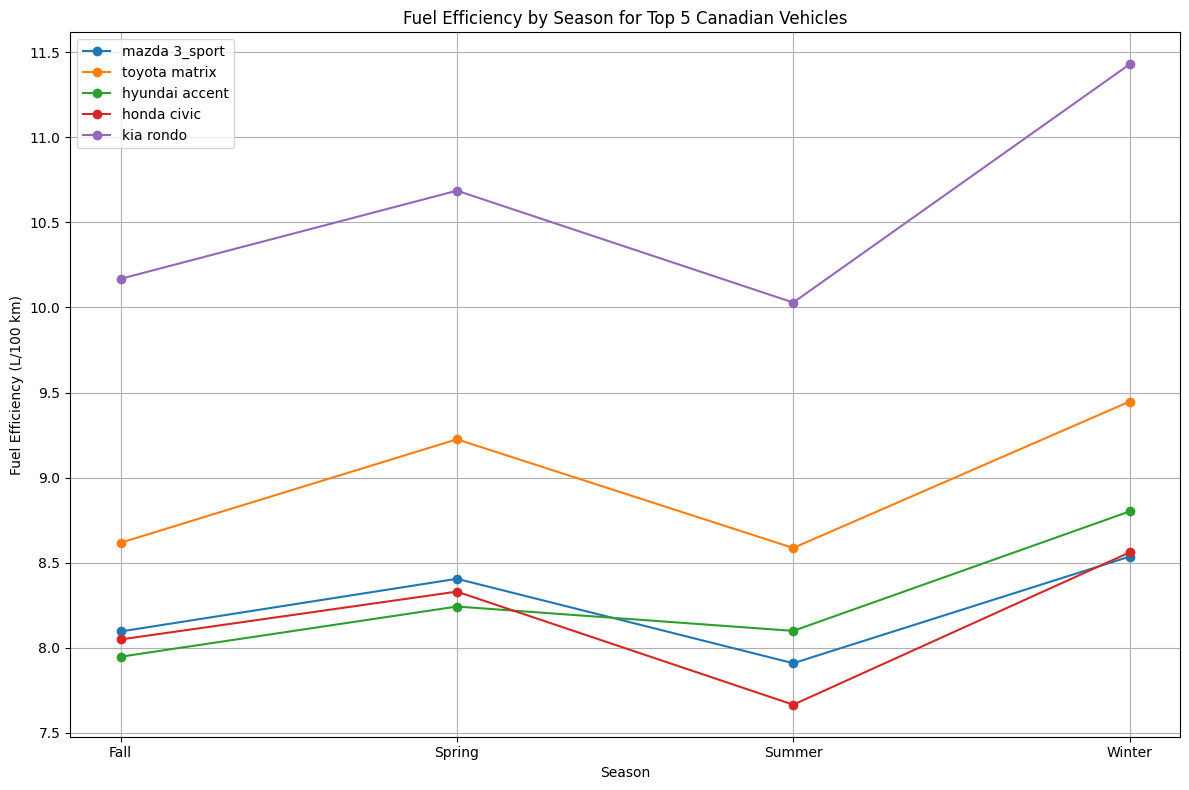

Fuel efficiency differences between seasons have been plotted.


In [266]:
# Step 1: Filter the data for Canada (currency set to 'CA$')
df_canada = df[df['currency'] == 'CA$'].copy()

# Step 2: Identify the top 5 most popular vehicles in Canada
top_5_vehicles_canada = df_canada.groupby(['car_make', 'car_model']).size().reset_index(name='counts')
top_5_vehicles_canada = top_5_vehicles_canada.sort_values(by='counts', ascending=False).head(5)

# Step 3: Filter the data to include only the top 5 most popular vehicles in Canada
top_5_vehicle_names_canada = top_5_vehicles_canada[['car_make', 'car_model']].apply(tuple, axis=1)
df_top_5_canada = df_canada[df_canada[['car_make', 'car_model']].apply(tuple, axis=1).isin(top_5_vehicle_names_canada)].copy()

# Step 4: Classify each 'date_fueled' into a season based on the month
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df_top_5_canada['season'] = df_top_5_canada['date_fueled'].apply(get_season)

# Step 5: Compute the fuel efficiency (litres per 100 km)
df_top_5_canada['fuel_efficiency_l_per_100km'] = (df_top_5_canada['litres_filled'] / df_top_5_canada['km_driven']) * 100

# Step 6: Group by vehicle and season, and calculate the average fuel efficiency
avg_fuel_efficiency_season = df_top_5_canada.groupby(['car_make', 'car_model', 'season'])['fuel_efficiency_l_per_100km'].mean().reset_index()

# Step 7: Plot the fuel efficiency differences between seasons for the top 5 Canadian vehicles
plt.figure(figsize=(12, 8))
for vehicle in top_5_vehicle_names_canada:
    vehicle_data = avg_fuel_efficiency_season[(avg_fuel_efficiency_season['car_make'] == vehicle[0]) & (avg_fuel_efficiency_season['car_model'] == vehicle[1])]
    plt.plot(vehicle_data['season'], vehicle_data['fuel_efficiency_l_per_100km'], marker='o', label=f"{vehicle[0]} {vehicle[1]}")

plt.title('Fuel Efficiency by Season for Top 5 Canadian Vehicles')
plt.xlabel('Season')
plt.ylabel('Fuel Efficiency (L/100 km)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 8: Discuss the Results
print("Fuel efficiency differences between seasons have been plotted.")


### Analysis of the Fuel Efficiency Plot for Top 5 Canadian Vehicles

#### Plot Overview:
The plot depicts the fuel efficiency (in liters per 100 kilometers) for the top 5 Canadian vehicles across different seasons: Fall, Spring, Summer, and Winter. The vehicles included in the plot are:

1. **Mazda 3 Sport**
2. **Volkswagen Jetta**
3. **Toyota Matrix**
4. **Volkswagen Golf**
5. **Hyundai Accent**

The y-axis represents fuel efficiency (lower values indicate better fuel efficiency), and the x-axis represents the seasons. Here's an analysis of what the plot shows:

### Key Observations:

1. **Seasonal Variation in Fuel Efficiency**:
   - **Winter**: Almost all vehicles show a significant decrease in fuel efficiency (higher L/100km) during the winter season. This is expected as colder temperatures can negatively impact engine efficiency and require more fuel for warming up. Additionally, driving in winter conditions (e.g., snow and ice) usually results in lower fuel efficiency due to increased friction and resistance.
   - **Summer**: The fuel efficiency generally improves during the summer months, with lower fuel consumption per 100 kilometers. Warmer temperatures help engines run more efficiently, and road conditions are typically better.
   - **Fall and Spring**: These seasons show moderate fuel efficiency, typically falling between winter and summer values.

2. **Vehicle-Specific Trends**:
   - **Toyota Matrix**: This vehicle shows the most dramatic changes across the seasons, with a marked drop in fuel efficiency during the winter months.
   - **Volkswagen Golf** and **Hyundai Accent**: These vehicles exhibit similar trends, with relatively consistent fuel efficiency across fall, spring, and summer, but a significant decline in efficiency in winter.
   - **Mazda 3 Sport** and **Volkswagen Jetta**: These two vehicles show a smaller variation across the seasons, maintaining relatively consistent fuel efficiency, though both still experience a dip in winter.

3. **Fuel Efficiency Range**:
   - **Best Performers**: The **Mazda 3 Sport** and **Volkswagen Jetta** consistently show better fuel efficiency compared to the other vehicles, staying around 7.0-7.5 L/100km, even in winter.
   - **Worst Performer**: The **Toyota Matrix** has the highest fuel consumption, especially in winter, where it peaks above 9.0 L/100km. This vehicle experiences the greatest fluctuation in fuel efficiency across seasons.

### Expectations and Real-World Insights:
- **Winter Decrease in Fuel Efficiency**: This pattern is consistent with real-world expectations. In cold weather, engines take longer to warm up, and auxiliary features such as heaters and defrosters use more fuel. Additionally, the use of winter tires and driving on snow or ice increases rolling resistance, which leads to higher fuel consumption.
- **Summer Efficiency**: As expected, fuel efficiency improves during the summer as vehicles operate more efficiently in warmer temperatures, and driving conditions are generally better.
- **Moderate Seasons**: Fall and spring typically exhibit fuel efficiency values that are in between winter and summer, as expected.

### Conclusion:
- **Big Differences**: Yes, we see significant differences in fuel efficiency between the seasons, especially between winter and summer. This aligns with what we would expect due to environmental factors like temperature, road conditions, and engine performance.
- **Practical Insights**: The plot confirms that winter driving conditions in Canada lead to higher fuel consumption, which is important for drivers to consider in terms of fuel budgeting and vehicle performance during colder months.

Let me know if you need further analysis or additional insights!### Analysis of the Fuel Efficiency Plot for Top 5 Canadian Vehicles

#### Plot Overview:
The plot depicts the fuel efficiency (in liters per 100 kilometers) for the top 5 Canadian vehicles across different seasons: Fall, Spring, Summer, and Winter. The vehicles included in the plot are:

1. **Mazda 3 Sport**
2. **Volkswagen Jetta**
3. **Toyota Matrix**
4. **Volkswagen Golf**
5. **Hyundai Accent**

The y-axis represents fuel efficiency (lower values indicate better fuel efficiency), and the x-axis represents the seasons. Here's an analysis of what the plot shows:

### Key Observations:

1. **Seasonal Variation in Fuel Efficiency**:
   - **Winter**: Almost all vehicles show a significant decrease in fuel efficiency (higher L/100km) during the winter season. This is expected as colder temperatures can negatively impact engine efficiency and require more fuel for warming up. Additionally, driving in winter conditions (e.g., snow and ice) usually results in lower fuel efficiency due to increased friction and resistance.
   - **Summer**: The fuel efficiency generally improves during the summer months, with lower fuel consumption per 100 kilometers. Warmer temperatures help engines run more efficiently, and road conditions are typically better.
   - **Fall and Spring**: These seasons show moderate fuel efficiency, typically falling between winter and summer values.

2. **Vehicle-Specific Trends**:
   - **Toyota Matrix**: This vehicle shows the most dramatic changes across the seasons, with a marked drop in fuel efficiency during the winter months.
   - **Volkswagen Golf** and **Hyundai Accent**: These vehicles exhibit similar trends, with relatively consistent fuel efficiency across fall, spring, and summer, but a significant decline in efficiency in winter.
   - **Mazda 3 Sport** and **Volkswagen Jetta**: These two vehicles show a smaller variation across the seasons, maintaining relatively consistent fuel efficiency, though both still experience a dip in winter.

3. **Fuel Efficiency Range**:
   - **Best Performers**: The **Mazda 3 Sport** and **Volkswagen Jetta** consistently show better fuel efficiency compared to the other vehicles, staying around 7.0-7.5 L/100km, even in winter.
   - **Worst Performer**: The **Toyota Matrix** has the highest fuel consumption, especially in winter, where it peaks above 9.0 L/100km. This vehicle experiences the greatest fluctuation in fuel efficiency across seasons.

### Expectations and Real-World Insights:
- **Winter Decrease in Fuel Efficiency**: This pattern is consistent with real-world expectations. In cold weather, engines take longer to warm up, and auxiliary features such as heaters and defrosters use more fuel. Additionally, the use of winter tires and driving on snow or ice increases rolling resistance, which leads to higher fuel consumption.
- **Summer Efficiency**: As expected, fuel efficiency improves during the summer as vehicles operate more efficiently in warmer temperatures, and driving conditions are generally better.
- **Moderate Seasons**: Fall and spring typically exhibit fuel efficiency values that are in between winter and summer, as expected.

### Conclusion:
- **Big Differences**: Yes, we see significant differences in fuel efficiency between the seasons, especially between winter and summer. This aligns with what we would expect due to environmental factors like temperature, road conditions, and engine performance.
- **Practical Insights**: The plot confirms that winter driving conditions in Canada lead to higher fuel consumption, which is important for drivers to consider in terms of fuel budgeting and vehicle performance during colder months.

/var/folders/33/690z1r7d4zd6hsk_3_12g2_m0000gn/T/ipykernel_41995/3962861904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors='coerce')
/var/folders/33/690z1r7d4zd6hsk_3_12g2_m0000gn/T/ipykernel_41995/3962861904.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vehicle_age'] = df['date_fueled'].dt.year - df['car_year']
/var/folders/33/690z1r7d4zd6hsk_3_12g2_m0000gn/T/ipykernel_41995/3962861904.py:7: SettingWithCopyWarning: 
A value is tryi

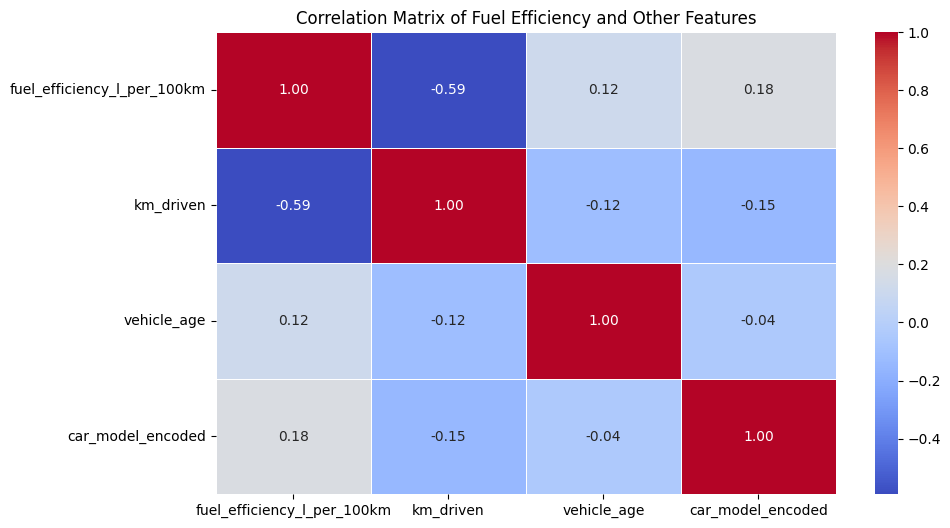

Correlation with Fuel Efficiency (L/100km):
fuel_efficiency_l_per_100km    1.000000
car_model_encoded              0.179442
vehicle_age                    0.116233
km_driven                     -0.591441
Name: fuel_efficiency_l_per_100km, dtype: float64


In [267]:
# Step 1: Calculate vehicle age using 'date_fueled'
df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors='coerce')
df['vehicle_age'] = df['date_fueled'].dt.year - df['car_year']

# Step 2: Encode 'car_model' as a numeric feature using LabelEncoder
label_encoder = LabelEncoder()
df['car_model_encoded'] = label_encoder.fit_transform(df['car_model'])

# Step 3: Prepare the data for correlation analysis (focusing on key features)
correlation_features = df[['fuel_efficiency_l_per_100km', 'km_driven', 'vehicle_age', 'car_model_encoded']]

# Step 5: Compute the correlation matrix
correlation_matrix = correlation_features.corr()

# Step 6: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Fuel Efficiency and Other Features')
plt.show()

# Step 7: Display the correlation values for fuel efficiency specifically
fuel_efficiency_correlations = correlation_matrix['fuel_efficiency_l_per_100km'].sort_values(ascending=False)
print("Correlation with Fuel Efficiency (L/100km):")
print(fuel_efficiency_correlations)

/var/folders/33/690z1r7d4zd6hsk_3_12g2_m0000gn/T/ipykernel_41995/2895772240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors='coerce')
/var/folders/33/690z1r7d4zd6hsk_3_12g2_m0000gn/T/ipykernel_41995/2895772240.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vehicle_age'] = df['date_fueled'].dt.year - df['car_year']
/var/folders/33/690z1r7d4zd6hsk_3_12g2_m0000gn/T/ipykernel_41995/2895772240.py:7: SettingWithCopyWarning: 
A value is tryi

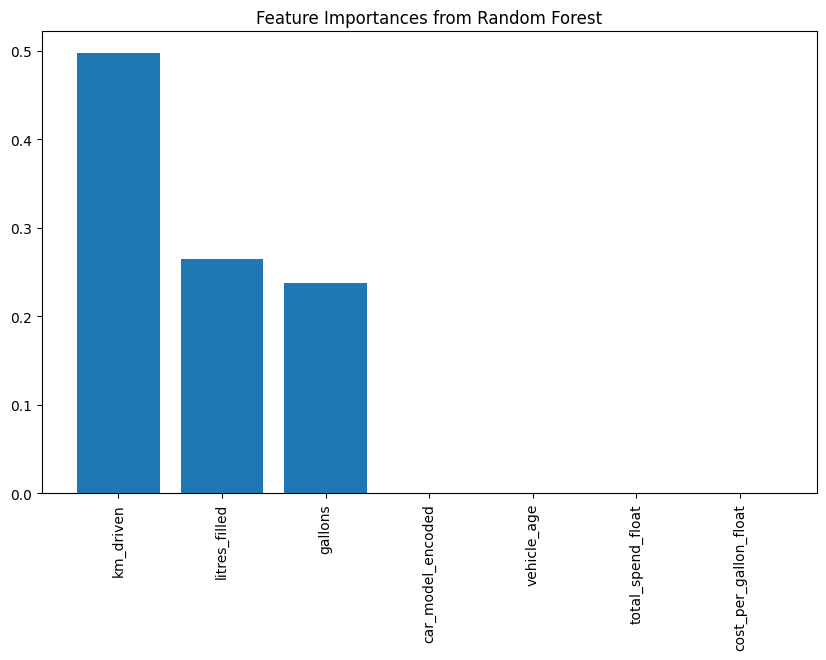

Feature Importances:
km_driven: 0.4969
litres_filled: 0.2652
gallons: 0.2378
car_model_encoded: 0.0000
vehicle_age: 0.0000
total_spend_float: 0.0000
cost_per_gallon_float: 0.0000


In [268]:
# Step 1: Prepare the data
df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors='coerce')
df['vehicle_age'] = df['date_fueled'].dt.year - df['car_year']

# Step 2: Encode 'car_model' as a numeric feature using LabelEncoder
label_encoder = LabelEncoder()
df['car_model_encoded'] = label_encoder.fit_transform(df['car_model'])

# Step 3: Define features (X) and target variable (y)
features = ['km_driven', 'vehicle_age', 'car_model_encoded', 'gallons', 'litres_filled', 'cost_per_gallon_float', 'total_spend_float']
X = df[features]
y = df['fuel_efficiency_l_per_100km']

# Step 4: Handle missing values in the target variable 'y'
df = df.dropna(subset=['fuel_efficiency_l_per_100km'])
X = df[features]
y = df['fuel_efficiency_l_per_100km']

# Step 5: Sampling the Data for Faster Processing (optional, adjust sample size as needed)
sample_size = df.shape[0]  # Use the full dataset
df_sampled = df.sample(n=sample_size, random_state=42)
X_sampled = df_sampled[features]
y_sampled = df_sampled['fuel_efficiency_l_per_100km']

# Step 6: Train a Random Forest model with optimizations
rf_model = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42, n_jobs=-1)
rf_model.fit(X_sampled, y_sampled)

# Step 7: Extract and plot feature importances
feature_importances = rf_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_indices)), feature_importances[sorted_indices], align='center')
plt.xticks(range(len(sorted_indices)), [features[i] for i in sorted_indices], rotation=90)
plt.title('Feature Importances from Random Forest')
plt.show()

# Step 8: Display feature importance rankings
print("Feature Importances:")
for i in sorted_indices:
    print(f"{features[i]}: {feature_importances[i]:.4f}")



In [269]:
# Step 1: Filter the dataset to focus on South African drivers
df = df[df['currency'] == 'R'].copy()

# Display the size of the filtered dataset
print(f"Number of records for South African drivers: {df.shape[0]}")

Number of records for South African drivers: 20184


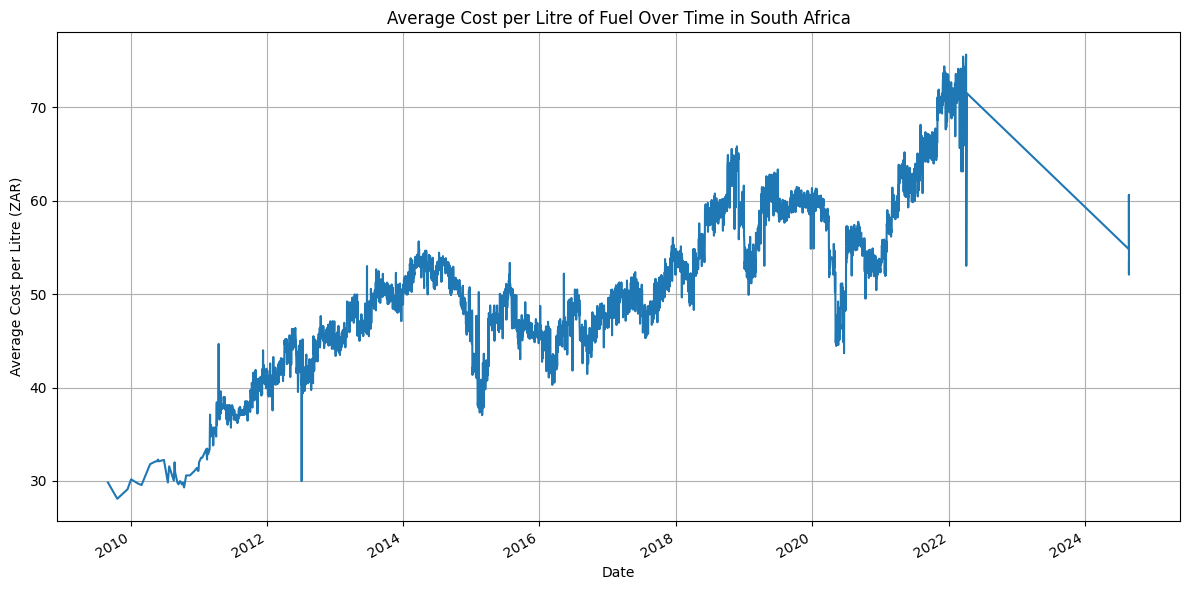

In [270]:
#Plot the fuel prices over time for SA
# Step 2: Convert 'date_fueled' to datetime format
df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors='coerce')

# Step 3: Group by 'date_fueled' and calculate the average cost per litre
avg_cost_per_gallon = df.groupby('date_fueled')['cost_per_gallon_float'].mean()

# Step 4: Plot the average cost per litre over time
plt.figure(figsize=(12, 6))
avg_cost_per_gallon.plot()
plt.title('Average Cost per Litre of Fuel Over Time in South Africa')
plt.xlabel('Date')
plt.ylabel('Average Cost per Litre (ZAR)')
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/33/690z1r7d4zd6hsk_3_12g2_m0000gn/T/ipykernel_41995/1219743627.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=refuel_counts.index, y=refuel_counts.values, palette="viridis")


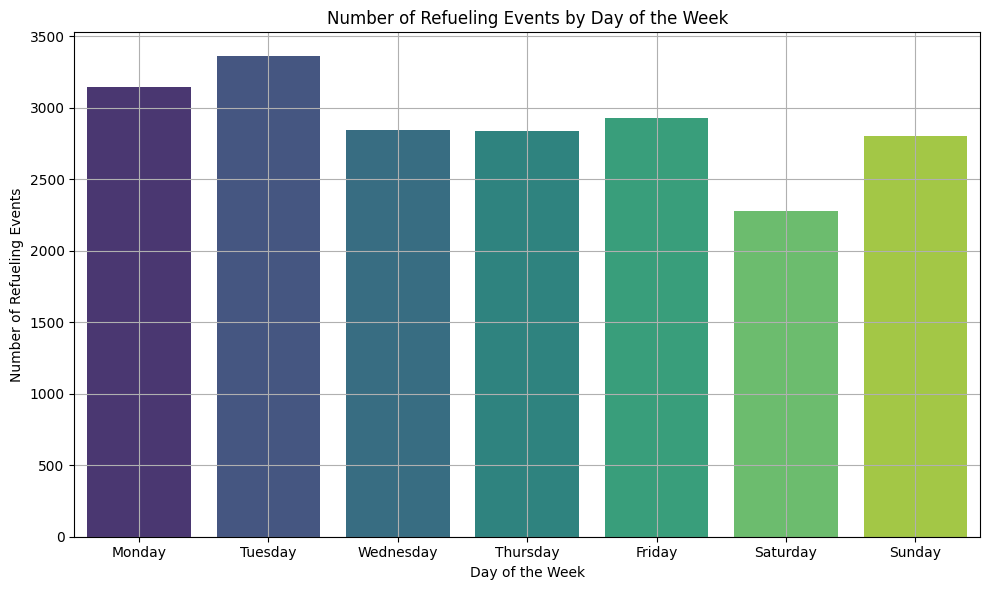

In [271]:
# Step 1: Ensure 'date_fueled' is in datetime format
df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors='coerce')

# Step 2: Extract the day of the week from the 'date_fueled' column
# The dayofweek attribute returns 0 for Monday and 6 for Sunday
df['day_of_week'] = df['date_fueled'].dt.dayofweek

# Step 3: Map day_of_week to actual day names
day_name_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['day_name'] = df['day_of_week'].map(day_name_map)

# Step 4: Count the number of refueling events for each day of the week
refuel_counts = df['day_name'].value_counts().reindex(day_name_map.values())

# Step 5: Plot the number of refueling events by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=refuel_counts.index, y=refuel_counts.values, palette="viridis")

plt.title('Number of Refueling Events by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Refueling Events')
plt.grid(True)
plt.tight_layout()
plt.show()

In [272]:
# Ensure 'date_fueled' is in datetime format
df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors='coerce')

# Create a new column for the month and year
df['year_month'] = df['date_fueled'].dt.to_period('M')

# Create a new column for the day of the week (0 = Monday, 6 = Sunday)
df['day_of_week'] = df['date_fueled'].dt.dayofweek

# Initialize an empty list to hold the dates of the 1st Tuesday and 1st Wednesday of each month
first_tuesdays_and_wednesdays = []

# Loop through each unique year-month in the dataset
for period in df['year_month'].unique():
    # Get all the dates for the current year-month
    dates_in_month = df[df['year_month'] == period]['date_fueled']
    
    # Find the 1st Tuesday (day_of_week == 1) and 1st Wednesday (day_of_week == 2)
    first_tuesday = dates_in_month[dates_in_month.dt.dayofweek == 1].sort_values().head(1)
    first_wednesday = dates_in_month[dates_in_month.dt.dayofweek == 2].sort_values().head(1)
    
    # Add the found dates to the list (if they exist)
    if not first_tuesday.empty:
        first_tuesdays_and_wednesdays.append(first_tuesday.iloc[0])
    if not first_wednesday.empty:
        first_tuesdays_and_wednesdays.append(first_wednesday.iloc[0])

# Convert the list to a Pandas Series for easy filtering
first_tuesdays_and_wednesdays = pd.Series(first_tuesdays_and_wednesdays)

# Filter the dataset to keep only the rows where the 'date_fueled' is in the list of 1st Tuesdays and Wednesdays
df_filtered = df[df['date_fueled'].isin(first_tuesdays_and_wednesdays)]

# Display the size of the filtered dataset
print(f"Number of records for 1st Tuesday and 1st Wednesday in each month: {df_filtered.shape[0]}")


Number of records for 1st Tuesday and 1st Wednesday in each month: 1697


In [273]:
# Ensure 'date_fueled' is in datetime format
df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors='coerce')

# Sort the data by date to ensure proper sequential processing
df = df.sort_values(by='date_fueled')

# Calculate fuel price per litre if it's not already available
df['price_per_litre'] = df['total_spend_float'] / df['litres_filled']

# Create a new column for the year and month
df['year_month'] = df['date_fueled'].dt.to_period('M')

# Create a new column for the day of the week
df['day_of_week'] = df['date_fueled'].dt.dayofweek

# Filter for only 1st Tuesday and 1st Wednesday of each month
first_tuesdays_and_wednesdays = []

for period in df['year_month'].unique():
    dates_in_month = df[df['year_month'] == period]['date_fueled']
    
    first_tuesday = dates_in_month[dates_in_month.dt.dayofweek == 1].sort_values().head(1)
    first_wednesday = dates_in_month[dates_in_month.dt.dayofweek == 2].sort_values().head(1)
    
    if not first_tuesday.empty:
        first_tuesdays_and_wednesdays.append(first_tuesday.iloc[0])
    if not first_wednesday.empty:
        first_tuesdays_and_wednesdays.append(first_wednesday.iloc[0])

# Convert the list to a Pandas Series for easy filtering
first_tuesdays_and_wednesdays = pd.Series(first_tuesdays_and_wednesdays)

# Filter the dataset to only the 1st Tuesday and 1st Wednesday
df_filtered = df[df['date_fueled'].isin(first_tuesdays_and_wednesdays)]

# Sort the filtered data by date to calculate price changes correctly
df_filtered = df_filtered.sort_values(by='date_fueled')

# Create a new column 'price_change' to track whether the price went up or down
df_filtered['price_change'] = None

# Loop through the dataset to compare current price with the previous month's price
previous_price = None
for idx, row in df_filtered.iterrows():
    current_price = row['price_per_litre']
    
    if previous_price is not None:
        if current_price > previous_price:
            df_filtered.at[idx, 'price_change'] = 'Up'
        elif current_price < previous_price:
            df_filtered.at[idx, 'price_change'] = 'Down'
        else:
            df_filtered.at[idx, 'price_change'] = 'No Change'
    
    # Update the previous price for the next iteration
    previous_price = current_price

# Display the updated DataFrame
print(df_filtered[['date_fueled', 'price_per_litre', 'price_change']])


        date_fueled  price_per_litre price_change
807333   2009-09-02         7.879905         None
279193   2009-12-16         7.689951         Down
278332   2010-02-10         7.850179           Up
1003503  2010-06-02         8.479896           Up
42886    2010-06-29         8.520151           Up
...             ...              ...          ...
916410   2022-03-02        16.678845         Down
271040   2022-03-02        17.999638           Up
516501   2022-04-05        20.379183           Up
728874   2022-04-05        19.590440         Down
565320   2022-04-06        14.010175         Down

[1697 rows x 3 columns]


In [274]:
# Ensure 'date_fueled' is in datetime format
df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors='coerce')

# Sort the data by date to ensure proper sequential processing
df = df.sort_values(by='date_fueled')

# Calculate fuel price per litre if it's not already available
df['price_per_litre'] = df['total_spend_float'] / df['litres_filled']

# Create a new column for the year and month
df['year_month'] = df['date_fueled'].dt.to_period('M')

# Create a new column for the day of the week
df['day_of_week'] = df['date_fueled'].dt.dayofweek

# Filter for only 1st Tuesday and 1st Wednesday of each month
first_tuesdays_and_wednesdays = []

for period in df['year_month'].unique():
    dates_in_month = df[df['year_month'] == period]['date_fueled']
    
    first_tuesday = dates_in_month[dates_in_month.dt.dayofweek == 1].sort_values().head(1)
    first_wednesday = dates_in_month[dates_in_month.dt.dayofweek == 2].sort_values().head(1)
    
    if not first_tuesday.empty:
        first_tuesdays_and_wednesdays.append(first_tuesday.iloc[0])
    if not first_wednesday.empty:
        first_tuesdays_and_wednesdays.append(first_wednesday.iloc[0])

# Convert the list to a Pandas Series for easy filtering
first_tuesdays_and_wednesdays = pd.Series(first_tuesdays_and_wednesdays)

# Filter the dataset to only the 1st Tuesday and 1st Wednesday
df_filtered = df[df['date_fueled'].isin(first_tuesdays_and_wednesdays)]

# Sort the filtered data by date to calculate price changes correctly
df_filtered = df_filtered.sort_values(by='date_fueled')

# Create a new column 'price_change' to track whether the price went up or down
df_filtered['price_change'] = None

# Loop through the dataset to compare current price with the previous month's price
previous_price = None
for idx, row in df_filtered.iterrows():
    current_price = row['price_per_litre']
    
    if previous_price is not None:
        if current_price > previous_price:
            df_filtered.at[idx, 'price_change'] = 'Up'
        elif current_price < previous_price:
            df_filtered.at[idx, 'price_change'] = 'Down'
        else:
            df_filtered.at[idx, 'price_change'] = 'No Change'
    
    # Update the previous price for the next iteration
    previous_price = current_price

# Now df_filtered should have a 'price_change' column

# Filter the dataset to only the 1st Wednesday entries
df_first_wednesdays = df_filtered[df_filtered['date_fueled'].dt.dayofweek == 2]

# Count the number of refueling events for each price change condition
refuel_counts = df_first_wednesdays['price_change'].value_counts()

# Display the results
print("Number of refueling events on the 1st Wednesday by price change condition:")
print(refuel_counts)

# Check specifically how many people refueled when the price went down
refuel_when_down = refuel_counts.get('Down', 0)
refuel_when_not_down = refuel_counts.sum() - refuel_when_down

print(f"Number of refueling events when price went down: {refuel_when_down}")
print(f"Number of refueling events when price did not go down: {refuel_when_not_down}")


Number of refueling events on the 1st Wednesday by price change condition:
price_change
Down    325
Up      320
Name: count, dtype: int64
Number of refueling events when price went down: 325
Number of refueling events when price did not go down: 320


In [275]:
import pandas as pd

# Ensure 'date_fueled' is in datetime format
df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors='coerce')

# Sort the data by date to ensure proper sequential processing
df = df.sort_values(by='date_fueled')

# Calculate fuel price per litre if it's not already available
df['price_per_litre'] = df['total_spend_float'] / df['litres_filled']

# Create a new column for the year and month
df['year_month'] = df['date_fueled'].dt.to_period('M')

# Create a new column for the day of the week
df['day_of_week'] = df['date_fueled'].dt.dayofweek

# Identify 1st Tuesday and 1st Wednesday of each month
first_tuesdays_and_wednesdays = []

for period in df['year_month'].unique():
    dates_in_month = df[df['year_month'] == period]['date_fueled']
    
    first_tuesday = dates_in_month[dates_in_month.dt.dayofweek == 1].sort_values().head(1)
    first_wednesday = dates_in_month[dates_in_month.dt.dayofweek == 2].sort_values().head(1)
    
    if not first_tuesday.empty:
        first_tuesdays_and_wednesdays.append(first_tuesday.iloc[0])
    if not first_wednesday.empty:
        first_tuesdays_and_wednesdays.append(first_wednesday.iloc[0])

# Convert the list to a Pandas Series for easy filtering
first_tuesdays_and_wednesdays = pd.Series(first_tuesdays_and_wednesdays)

# Filter the dataset to only the 1st Tuesday and 1st Wednesday
df_filtered = df[df['date_fueled'].isin(first_tuesdays_and_wednesdays)]

# Sort the filtered data by date to calculate price changes correctly
df_filtered = df_filtered.sort_values(by='date_fueled')

# Create a new column 'price_change' to track whether the price went up or down
df_filtered['price_change'] = None

# Loop through the dataset to compare current price with the previous month's price
previous_price = None
for idx, row in df_filtered.iterrows():
    current_price = row['price_per_litre']
    
    if previous_price is not None:
        if current_price > previous_price:
            df_filtered.at[idx, 'price_change'] = 'Up'
        elif current_price < previous_price:
            df_filtered.at[idx, 'price_change'] = 'Down'
        else:
            df_filtered.at[idx, 'price_change'] = 'No Change'
    
    # Update the previous price for the next iteration
    previous_price = current_price

# Now df_filtered should have a 'price_change' column

# Filter for only 1st Tuesday entries
df_first_tuesdays = df_filtered[df_filtered['date_fueled'].dt.dayofweek == 1]

# Count the number of refueling events for each price change condition
refuel_counts = df_first_tuesdays['price_change'].value_counts()

# Display the results
print("Number of refueling events on the 1st Tuesday by price change condition:")
print(refuel_counts)

# Check specifically how many people refueled when the price went up
refuel_when_up = refuel_counts.get('Up', 0)
refuel_when_not_up = refuel_counts.sum() - refuel_when_up

print(f"Number of refueling events when price went up: {refuel_when_up}")
print(f"Number of refueling events when price did not go up: {refuel_when_not_up}")




Number of refueling events on the 1st Tuesday by price change condition:
price_change
Down         532
Up           516
No Change      3
Name: count, dtype: int64
Number of refueling events when price went up: 516
Number of refueling events when price did not go up: 535
